<a href="https://colab.research.google.com/github/MohammadDeep/pian-file-public/blob/main/3_1_dataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# مسیر فایل‌ها
file_path1 = '/content/drive/MyDrive/dataset/PainMoint/extracted_files/PMED/PMHDB/saved_x_norm,y_norm.pkl'
file_path2 = '/content/drive/MyDrive/dataset/PainMoint/extracted_files/PMED/PMHDB/y_data_have_pain_clear.pkl'
save_path = '/content/drive/MyDrive/dataset/PainMoint/extracted_files/PMED/PMHDB/y_scali_1000.pkl'

In [ ]:

import os
import pickle





def load_pickle(file_path):
    if os.path.exists(file_path):
        with open(file_path, 'rb') as f:
            return pickle.load(f)
    else:
        print("فایل یافت نشد:", file_path)
        return None

# بارگذاری فایل‌ها
x_norm,y_norm = load_pickle(file_path1)
y_data_have_pain_clear = load_pickle(file_path2)




In [ ]:
y_data_have_pain_clear[0][:,1].shape

torch.Size([362620])

In [ ]:
# prompt: device را پیدا کن و درمتقیری به نام device بریز
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
# prompt: sort y_data_have_pain_clear[0][:,1]
import torch
sorted_y_data = torch.tensor(sorted(y_data_have_pain_clear[0][:, 1]), device =device)

sorted_y_data[-2]


tensor(4.2476, device='cuda:0')

In [ ]:
# prompt: میانگین sorted_y_data[-2]

mean_second_to_last = torch.mean(sorted_y_data[:])
mean_second_to_last


tensor(-0.1128, device='cuda:0')

In [ ]:
import matplotlib.pyplot as plt
import torch
def scali_label(label , scale = 100, n = 0.2, show_plot = False):
  len_label = label.shape[0]
  new_label = []
  for i in (range(int(len_label//scale))):
    #print(f' {i//scale} / {len_label// scale}')
    data = label[i*scale:(i+1)*scale]
    sorted_y_data = torch.tensor(sorted(data), device =device)
    nd = int(-1 * n * scale)
    mean_second_to_last = torch.mean(sorted_y_data[nd:])
    new_label.append(mean_second_to_last.cpu())
  if show_plot:
    new_list = []
    for i in new_label:
      for i1 in range(scale):
        new_list.append(i)
    plt.figure(figsize=(100, 5))
    plt.plot(new_list , label = 'new')
    plt.plot(label.cpu(), label = "orj")
    plt.show()
  return new_label

def y_scali_all(y_data, scale , n ,signal_number = [2,3]):
  len_persion = len(y_data)
  new_data = []
  for i in range(len_persion):
    print(f'persion : {i + 1}')
    signales = y_data[i]
    len_signal = signales.shape[1]
    data_n = []
    for i1 in signal_number:
      print(f'  signal : {i1 + 1}')
      data_n.append(scali_label(signales[:, i1] , scale , n , show_plot = False))
    tensor_n = torch.tensor(data_n, device = device)
    new_data.append(tensor_n)

  return new_data

In [ ]:
y_data_have_pain_clear[0].shape[1]

4

In [ ]:
y_scali_1000 = y_scali_all(y_data =y_data_have_pain_clear , scale = 1000 , n = 0.1 )

persion : 1
  signal : 3/2
  signal : 4/2
persion : 2
  signal : 3/2
  signal : 4/2
persion : 3
  signal : 3/2
  signal : 4/2
persion : 4
  signal : 3/2
  signal : 4/2
persion : 5
  signal : 3/2
  signal : 4/2
persion : 6
  signal : 3/2
  signal : 4/2
persion : 7
  signal : 3/2
  signal : 4/2
persion : 8
  signal : 3/2
  signal : 4/2
persion : 9
  signal : 3/2
  signal : 4/2
persion : 10
  signal : 3/2
  signal : 4/2
persion : 11
  signal : 3/2
  signal : 4/2
persion : 12
  signal : 3/2
  signal : 4/2
persion : 13
  signal : 3/2
  signal : 4/2
persion : 14
  signal : 3/2
  signal : 4/2
persion : 15
  signal : 3/2
  signal : 4/2
persion : 16
  signal : 3/2
  signal : 4/2
persion : 17
  signal : 3/2
  signal : 4/2
persion : 18
  signal : 3/2
  signal : 4/2
persion : 19
  signal : 3/2
  signal : 4/2
persion : 20
  signal : 3/2
  signal : 4/2
persion : 21
  signal : 3/2
  signal : 4/2
persion : 22
  signal : 3/2
  signal : 4/2
persion : 23
  signal : 3/2
  signal : 4/2
persion : 24
  signa

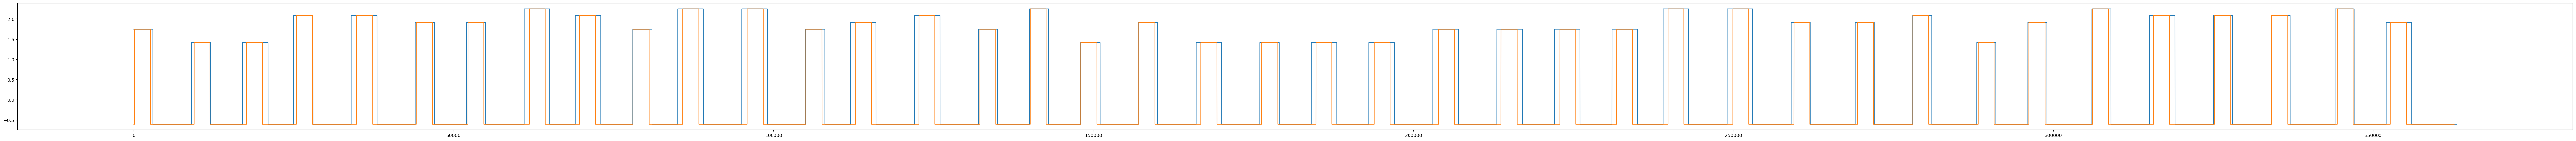

In [ ]:
d  = scali_label(y_data_have_pain_clear[0][:, 2] , scale = 1000, n = 0.1, show_plot = True)

In [ ]:
y_scali_1000[0].T.shape, y_data_have_pain_clear[0].shape

(torch.Size([363, 2]), torch.Size([362620, 4]))

In [ ]:
new_scali_1000 = []
for i in y_scali_1000:
  new_scali_1000.append(i.T)

In [ ]:
new_scali_1000[10].shape

torch.Size([365, 2])

In [ ]:
# prompt: save file 'y_scali_1000'

from google.colab import drive
import os
import pickle
import torch
import matplotlib.pyplot as plt

# Save y_scali_1000 to a file
with open(save_path, 'wb') as f:
  pickle.dump(new_scali_1000, f)
